In [1]:
import os
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(rc={'figure.figsize':(14,8)})
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data from a CSV file
file_path = os.path.join('..', 'Dataset', 'data.csv')
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,datetime,temp,dew,humidity,windspeed
0,2023-08-10T00:00:00,28.0,26.0,88.92,16.6
1,2023-08-10T01:00:00,28.0,26.0,88.92,14.8
2,2023-08-10T02:00:00,27.9,25.2,85.28,6.9
3,2023-08-10T03:00:00,28.0,26.0,88.92,7.6
4,2023-08-10T04:00:00,28.0,26.0,88.92,14.8


In [3]:
# Convert 'datetime' to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

df.head(24)

,temp,dew,humidity,windspeed
datetime,,,,
2023-08-10 00:00:00,28.0,26.0,88.92,16.6
2023-08-10 01:00:00,28.0,26.0,88.92,14.8
2023-08-10 02:00:00,27.9,25.2,85.28,6.9
2023-08-10 03:00:00,28.0,26.0,88.92,7.6
2023-08-10 04:00:00,28.0,26.0,88.92,14.8
2023-08-10 05:00:00,28.0,25.3,85.29,3.9
2023-08-10 06:00:00,27.0,26.0,94.27,9.4
2023-08-10 07:00:00,28.0,25.7,87.28,13.1
2023-08-10 08:00:00,28.1,26.0,88.71,5.5


# Autoregression (AR)

The autoregression (AR) method predicts the subsequent value in a sequence using a linear combination of previous observations. 

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is best suited for single-variable time series that lack trend and seasonal components.

# Example

[1.606475804265477, 2.0528871624728824, 3.3510638250265448, 4.202126575633575, 5.051321878267424, 6.31653823300866, 7.6671867703547925, 8.734160150056017, 9.071272411026088, 10.379800148235828, 11.286836069892617, 12.709544165448182, 13.717618142854894, 14.290551946699402, 15.657681722404902, 16.515763868857462, 17.316320904301264, 18.034532376062163, 19.0563946058564, 20.275738820569632, 21.966319075151024, 22.78623361960754, 23.786944699858573, 24.83829198862782, 25.166330827979863, 26.029495509389555, 27.472675521865554, 28.90124173011169, 29.15887157445701, 30.0563947078498, 31.474449283025518, 32.709465905299155, 33.48344671745039, 34.952621285457376, 35.56584538384878, 36.940563640529504, 37.559522933822024, 38.801677997236574, 39.39895019280923, 40.510843204063306, 41.23401905645023, 42.2017498690267, 43.793294398911165, 44.05559857234898, 45.32846628558527, 46.51815811322434, 47.20998094441331, 48.64709070278121, 49.92186543388154, 50.770735550370084, 51.761985358416936, 52.631

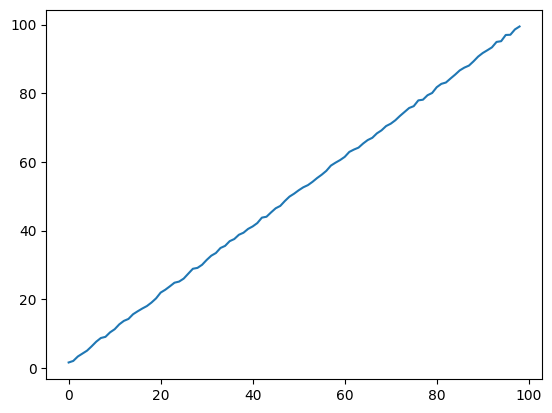

[100.46784276]


In [12]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]
print(f"data : {data}")

plt.plot(data)
plt.show()

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)


In [13]:
# Split data into training and test sets (use the last 24 hours as test set)
train_data = df['temp'][:-24]
test_data = df['temp'][-24:]

# Train the Autoregression model
model = AutoReg(train_data, lags=24)  # 24 lag hours
model_fitted = model.fit()


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [17]:
# Save the trained model
with open('temperature_ar_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_ar_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")

Model trained and saved.
Model loaded.


In [31]:
# Make predictions for the next 24 hours
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Next 24-hour temperature predictions : \n")
print(round(predictions,1))

Next 24-hour temperature predictions : 

2024-08-26 00:00:00    27.7
2024-08-26 01:00:00    27.3
2024-08-26 02:00:00    26.9
2024-08-26 03:00:00    27.0
2024-08-26 04:00:00    26.8
2024-08-26 05:00:00    26.4
2024-08-26 06:00:00    26.8
2024-08-26 07:00:00    27.2
2024-08-26 08:00:00    27.2
2024-08-26 09:00:00    27.5
2024-08-26 10:00:00    27.9
2024-08-26 11:00:00    28.0
2024-08-26 12:00:00    27.8
2024-08-26 13:00:00    27.8
2024-08-26 14:00:00    27.7
2024-08-26 15:00:00    27.4
2024-08-26 16:00:00    27.3
2024-08-26 17:00:00    27.5
2024-08-26 18:00:00    27.6
2024-08-26 19:00:00    27.6
2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [25]:
len(train_data), len(train_data) + 23

(9168, 9191)

In [29]:
# Make predictions for the next 24 hours
predictions = loaded_model.predict(start=len(train_data) + 20, end=len(train_data) + 40)

# Display the predictions
print("Next 24-hour temperature predictions : \n")
print(round(predictions,1))

Next 24-hour temperature predictions : 

2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
2024-08-27 00:00:00    27.7
2024-08-27 01:00:00    27.5
2024-08-27 02:00:00    27.2
2024-08-27 03:00:00    27.0
2024-08-27 04:00:00    27.0
2024-08-27 05:00:00    26.9
2024-08-27 06:00:00    26.9
2024-08-27 07:00:00    27.1
2024-08-27 08:00:00    27.3
2024-08-27 09:00:00    27.5
2024-08-27 10:00:00    27.7
2024-08-27 11:00:00    27.8
2024-08-27 12:00:00    27.8
2024-08-27 13:00:00    27.8
2024-08-27 14:00:00    27.7
2024-08-27 15:00:00    27.6
2024-08-27 16:00:00    27.6
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [30]:
test_data

datetime
2024-08-26 00:00:00    28.0
2024-08-26 01:00:00    28.0
2024-08-26 02:00:00    28.0
2024-08-26 03:00:00    28.0
2024-08-26 04:00:00    28.0
2024-08-26 05:00:00    28.0
2024-08-26 06:00:00    28.0
2024-08-26 07:00:00    28.0
2024-08-26 08:00:00    28.0
2024-08-26 09:00:00    28.5
2024-08-26 10:00:00    28.9
2024-08-26 11:00:00    28.9
2024-08-26 12:00:00    28.9
2024-08-26 13:00:00    28.9
2024-08-26 14:00:00    28.9
2024-08-26 15:00:00    28.9
2024-08-26 16:00:00    28.9
2024-08-26 17:00:00    28.9
2024-08-26 18:00:00    28.0
2024-08-26 19:00:00    28.0
2024-08-26 20:00:00    28.0
2024-08-26 21:00:00    28.0
2024-08-26 22:00:00    27.0
2024-08-26 23:00:00    28.0
Name: temp, dtype: float64

In [34]:
np.array(round(test_data,1)), np.array(round(predictions,1))

(array([28. , 28. , 28. , 28. , 28. , 28. , 28. , 28. , 28. , 28.5, 28.9,
        28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28. , 28. , 28. , 28. ,
        27. , 28. ]),
 array([27.7, 27.3, 26.9, 27. , 26.8, 26.4, 26.8, 27.2, 27.2, 27.5, 27.9,
        28. , 27.8, 27.8, 27.7, 27.4, 27.3, 27.5, 27.6, 27.6, 27.8, 27.9,
        27.9, 27.8]))

In [35]:
import numpy as np

def evaluate_time_series(actual, predicted):
    """
    Evaluate the performance of time series predictions using common error metrics.
    
    Parameters:
    actual (array-like): The actual values of the time series.
    predicted (array-like): The predicted values of the time series.
    
    Returns:
    dict: A dictionary containing MAE, MSE, RMSE, and MAPE values.
    """
    # Convert inputs to numpy arrays if they are not already
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate error metrics
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    # Return a dictionary of the results
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19


In [40]:
# Make predictions using specific datetime strings
start_date = '2024-08-01 00:00:00'
end_date = '2024-08-02 00:00:00'

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-01 00:00:00    27.8
2024-08-01 01:00:00    27.7
2024-08-01 02:00:00    27.8
2024-08-01 03:00:00    27.0
2024-08-01 04:00:00    27.0
2024-08-01 05:00:00    26.8
2024-08-01 06:00:00    27.3
2024-08-01 07:00:00    27.4
2024-08-01 08:00:00    28.1
2024-08-01 09:00:00    28.5
2024-08-01 10:00:00    29.5
2024-08-01 11:00:00    29.9
2024-08-01 12:00:00    29.8
2024-08-01 13:00:00    30.4
2024-08-01 14:00:00    29.9
2024-08-01 15:00:00    29.5
2024-08-01 16:00:00    29.2
2024-08-01 17:00:00    29.3
2024-08-01 18:00:00    28.8
2024-08-01 19:00:00    28.3
2024-08-01 20:00:00    27.7
2024-08-01 21:00:00    28.0
2024-08-01 22:00:00    27.6
2024-08-01 23:00:00    27.1
2024-08-02 00:00:00    27.3
Freq: H, dtype: float64


# Moving Average (MA)

The Moving Average (MA) method models predict the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

It’s important to note that a Moving Average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

We can use the ARIMA class to create an MA model and set a zeroth-order AR model. We must specify the order of the MA model in the order argument.

In [41]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_data, order=(0, 0, 1))
model_fit = model.fit()


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [42]:
# Save the trained model
with open('temperature_ma_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_ma_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")


Model trained and saved.
Model loaded.


In [43]:
# make prediction
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-26 00:00:00    27.7
2024-08-26 01:00:00    27.3
2024-08-26 02:00:00    26.9
2024-08-26 03:00:00    27.0
2024-08-26 04:00:00    26.8
2024-08-26 05:00:00    26.4
2024-08-26 06:00:00    26.8
2024-08-26 07:00:00    27.2
2024-08-26 08:00:00    27.2
2024-08-26 09:00:00    27.5
2024-08-26 10:00:00    27.9
2024-08-26 11:00:00    28.0
2024-08-26 12:00:00    27.8
2024-08-26 13:00:00    27.8
2024-08-26 14:00:00    27.7
2024-08-26 15:00:00    27.4
2024-08-26 16:00:00    27.3
2024-08-26 17:00:00    27.5
2024-08-26 18:00:00    27.6
2024-08-26 19:00:00    27.6
2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [44]:
# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19


|AR | I | MA |
|--|--|--|
|p = pacf | d = lag or diff. | q = acf |  

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

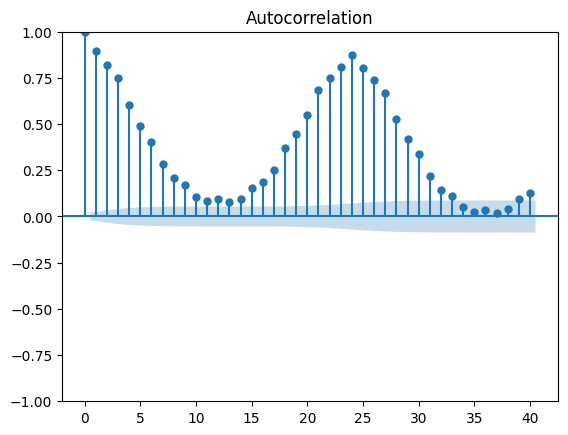

In [54]:
acf = plot_acf(df['temp'].dropna())
# p = 24

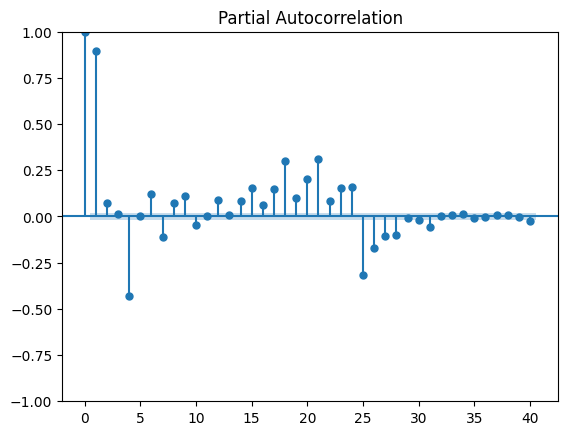

In [55]:
pacf = plot_pacf(df['temp'].dropna())
# p = 1, 2, 4, 6, 7, 8, 9, 10, ...

# Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method model predicts the next step in the sequence based on a linear combination of both past observations and past residual errors. 

The method combines both Autoregression (AR) and Moving Average (MA) models.

To represent the model, the notation involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [64]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_data, order=(1, 0, 1))
model_fit = model.fit()


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [65]:
# Save the trained model
with open('temperature_arma_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_arma_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")


Model trained and saved.
Model loaded.


In [66]:
# make prediction
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-26 00:00:00    27.7
2024-08-26 01:00:00    27.3
2024-08-26 02:00:00    26.9
2024-08-26 03:00:00    27.0
2024-08-26 04:00:00    26.8
2024-08-26 05:00:00    26.4
2024-08-26 06:00:00    26.8
2024-08-26 07:00:00    27.2
2024-08-26 08:00:00    27.2
2024-08-26 09:00:00    27.5
2024-08-26 10:00:00    27.9
2024-08-26 11:00:00    28.0
2024-08-26 12:00:00    27.8
2024-08-26 13:00:00    27.8
2024-08-26 14:00:00    27.7
2024-08-26 15:00:00    27.4
2024-08-26 16:00:00    27.3
2024-08-26 17:00:00    27.5
2024-08-26 18:00:00    27.6
2024-08-26 19:00:00    27.6
2024-08-26 20:00:00    27.8
2024-08-26 21:00:00    27.9
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    27.8
Freq: H, dtype: float64


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [67]:
# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19


# Autoregressive Integrated Moving Average (ARIMA)
The Autoregressive Integrated Moving Average (ARIMA) method model predicts the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

The method integrates the principles of Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The ARIMA approach is optimal for single-variable time series that exhibit a trend but lack seasonal variations.

In [76]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model (set p, d, q values; adjust as needed)
model = ARIMA(train_data, order=(24, 1, 1))  # p=5, d=1, q=2; adjust these hyperparameters based on your data
model_fitted = model.fit()

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

In [77]:
# Save the trained model
with open('temperature_arima_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_arima_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")


Model trained and saved.
Model loaded.


In [78]:
# make prediction
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-26 00:00:00    28.2
2024-08-26 01:00:00    28.1
2024-08-26 02:00:00    27.5
2024-08-26 03:00:00    27.9
2024-08-26 04:00:00    27.8
2024-08-26 05:00:00    27.2
2024-08-26 06:00:00    27.7
2024-08-26 07:00:00    27.8
2024-08-26 08:00:00    27.7
2024-08-26 09:00:00    28.3
2024-08-26 10:00:00    28.7
2024-08-26 11:00:00    28.5
2024-08-26 12:00:00    28.5
2024-08-26 13:00:00    28.4
2024-08-26 14:00:00    27.8
2024-08-26 15:00:00    27.3
2024-08-26 16:00:00    27.4
2024-08-26 17:00:00    27.9
2024-08-26 18:00:00    27.9
2024-08-26 19:00:00    27.7
2024-08-26 20:00:00    28.0
2024-08-26 21:00:00    28.2
2024-08-26 22:00:00    28.2
2024-08-26 23:00:00    28.2
Freq: H, Name: predicted_mean, dtype: float64


In [79]:
# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.48
MSE: 0.44
RMSE: 0.66
MAPE: 1.70


# Seasonal Autoregressive Integrated Moving-Average (SARIMA)
The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence based on a linear blend of differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

SARIMA enhances the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

In [82]:
# ARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMA model (set p, d, q, P, D, Q, s values; adjust as needed)
# (p, d, q) = (1, 1, 1) for non-seasonal part
# (P, D, Q, s) = (1, 1, 1, 24) for seasonal part (assuming daily seasonality with hourly data)
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fitted = model.fit()

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [83]:
# Save the trained model
with open('temperature_sarima_model.pkl', 'wb') as f:
    pickle.dump(model_fitted, f)

print("Model trained and saved.")

# Load the model for prediction
with open('temperature_sarima_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
print("Model loaded.")


Model trained and saved.
Model loaded.


In [84]:
# make prediction
predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-02 00:00:00 : 

2024-08-26 00:00:00    27.8
2024-08-26 01:00:00    27.6
2024-08-26 02:00:00    27.5
2024-08-26 03:00:00    27.4
2024-08-26 04:00:00    27.3
2024-08-26 05:00:00    27.2
2024-08-26 06:00:00    27.4
2024-08-26 07:00:00    27.5
2024-08-26 08:00:00    27.6
2024-08-26 09:00:00    28.4
2024-08-26 10:00:00    28.9
2024-08-26 11:00:00    29.2
2024-08-26 12:00:00    29.2
2024-08-26 13:00:00    29.4
2024-08-26 14:00:00    29.5
2024-08-26 15:00:00    28.7
2024-08-26 16:00:00    28.7
2024-08-26 17:00:00    29.0
2024-08-26 18:00:00    28.3
2024-08-26 19:00:00    28.0
2024-08-26 20:00:00    28.4
2024-08-26 21:00:00    28.1
2024-08-26 22:00:00    27.9
2024-08-26 23:00:00    28.2
Freq: H, Name: predicted_mean, dtype: float64


In [85]:
# Usage
actual_values = round(test_data,1)
predicted_values = round(predictions,1)

results = evaluate_time_series(actual_values, predicted_values)
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")


Evaluation Results:
MAE: 0.37
MSE: 0.20
RMSE: 0.44
MAPE: 1.32


# Process with other columns

In [27]:
# Lib's
import os
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def evaluate_time_series(actual, predicted):
    """
    Evaluate the performance of time series predictions using common error metrics.
    
    Parameters:
    actual (array-like): The actual values of the time series.
    predicted (array-like): The predicted values of the time series.
    
    Returns:
    dict: A dictionary containing MAE, MSE, RMSE, and MAPE values.
    """
    # Convert inputs to numpy arrays if they are not already
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    # Calculate error metrics
    mae = np.mean(np.abs(actual - predicted))
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    # Return a dictionary of the results
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }


In [40]:
def save_train_model(model, model_type, col):
    # Save the trained model
    with open(f'{col}_{model_type}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

#     print("Model trained and saved.")

    # Load the model for prediction
    with open(f'{col}_{model_type}_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)

#     print("Model loaded.")
    return loaded_model


In [41]:
def train_and_evaluate_model(data, col, model_type, order=None, seasonal_order=None):
    
    # Split data into training and test sets (use the last 24 hours as test set)
    train_data = data[col][:-24]
    test_data = data[col][-24:]

    # Model mapping based on model_type
    model_mapping = {
        'AR': lambda: AutoReg(train_data, lags=24).fit(),
        'MA': lambda: ARIMA(train_data, order=(0, 0, 1)).fit(),
        'ARMA': lambda: ARIMA(train_data, order=(1, 0, 1)).fit(),
        'ARIMA': lambda: ARIMA(train_data, order=(24, 1, 1)).fit(),
        'SARIMA': lambda: SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit(),
    }

    if model_type not in model_mapping:
        raise ValueError("Invalid model_type. Choose from 'AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA'.")

    # Initialize and train the model
    model = model_mapping[model_type]()
    print(f"Modele name : {type(model).__name__} || {col} || {model_type}")
    
    loaded_model = save_train_model(model, model_type, col)
    
    # make prediction
    predictions = loaded_model.predict(start=len(train_data), end=len(train_data) + 23)
    
    # Forecast and evaluate
    actual_values = round(test_data,1)
    predicted_values = round(predictions,1)

    results = evaluate_time_series(actual_values, predicted_values)
    print("Evaluation Results:")
    for metric, value in results.items():
        print(f"{metric}: {value:.2f}")


In [42]:
def main():
    # Load the data from a CSV file
    file_path = os.path.join('..', 'Dataset', 'data.csv')
    df = pd.read_csv(file_path)
    df = df.drop(['windspeed'], axis=1)

    # Display the first few rows of the dataframe
    # df.head()
    
    # Convert 'datetime' to a datetime object
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Set 'datetime' as the index
    df.set_index('datetime', inplace=True)

    # df.head(24)
    
    columns = df.columns
    model_list = ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA']
    
    for col in columns:
        for model_type in model_list:    
            train_and_evaluate_model(df, col, model_type)
        print('_'*40)
        print('\n')
            
main()    

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmod

Modele name : AutoRegResultsWrapper || temp || AR
Evaluation Results:
MAE: 0.90
MSE: 1.01
RMSE: 1.00
MAPE: 3.19
Modele name : ARIMAResultsWrapper || temp || MA
Evaluation Results:
MAE: 0.50
MSE: 0.33
RMSE: 0.58
MAPE: 1.78


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : ARIMAResultsWrapper || temp || ARMA
Evaluation Results:
MAE: 0.42
MSE: 0.26
RMSE: 0.51
MAPE: 1.48


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('N

Modele name : ARIMAResultsWrapper || temp || ARIMA
Evaluation Results:
MAE: 0.48
MSE: 0.44
RMSE: 0.66
MAPE: 1.70


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : SARIMAXResultsWrapper || temp || SARIMA
Evaluation Results:
MAE: 0.37
MSE: 0.20
RMSE: 0.44
MAPE: 1.32
________________________________________




C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : AutoRegResultsWrapper || dew || AR
Evaluation Results:
MAE: 0.47
MSE: 0.50
RMSE: 0.70
MAPE: 1.88


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmod

Modele name : ARIMAResultsWrapper || dew || MA
Evaluation Results:
MAE: 2.45
MSE: 6.48
RMSE: 2.54
MAPE: 10.00


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : ARIMAResultsWrapper || dew || ARMA
Evaluation Results:
MAE: 0.74
MSE: 0.92
RMSE: 0.96
MAPE: 2.99


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : ARIMAResultsWrapper || dew || ARIMA
Evaluation Results:
MAE: 0.43
MSE: 0.39
RMSE: 0.62
MAPE: 1.74


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : SARIMAXResultsWrapper || dew || SARIMA
Evaluation Results:
MAE: 0.48
MSE: 0.40
RMSE: 0.63
MAPE: 1.93
________________________________________




C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : AutoRegResultsWrapper || humidity || AR
Evaluation Results:
MAE: 3.44
MSE: 17.49
RMSE: 4.18
MAPE: 4.40


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmod

Modele name : ARIMAResultsWrapper || humidity || MA
Evaluation Results:
MAE: 9.67
MSE: 99.04
RMSE: 9.95
MAPE: 12.12


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : ARIMAResultsWrapper || humidity || ARMA
Evaluation Results:
MAE: 4.28
MSE: 25.14
RMSE: 5.01
MAPE: 5.33


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : ARIMAResultsWrapper || humidity || ARIMA
Evaluation Results:
MAE: 3.01
MSE: 16.14
RMSE: 4.02
MAPE: 3.85


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\solar_venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Modele name : SARIMAXResultsWrapper || humidity || SARIMA
Evaluation Results:
MAE: 3.04
MSE: 15.69
RMSE: 3.96
MAPE: 3.82
________________________________________




In [46]:
# Make predictions using specific datetime strings
start_date = '2024-08-01 00:00:00'
end_date = '2024-08-04 00:00:00'

# Load the model for prediction
with open(f'temp_SARIMA_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-04 00:00:00 : 

2024-08-01 00:00:00    28.0
2024-08-01 01:00:00    27.7
2024-08-01 02:00:00    28.3
2024-08-01 03:00:00    26.8
2024-08-01 04:00:00    27.3
                       ... 
2024-08-03 20:00:00    27.5
2024-08-03 21:00:00    27.5
2024-08-03 22:00:00    27.6
2024-08-03 23:00:00    28.2
2024-08-04 00:00:00    27.7
Freq: H, Name: predicted_mean, Length: 73, dtype: float64


<Axes: >

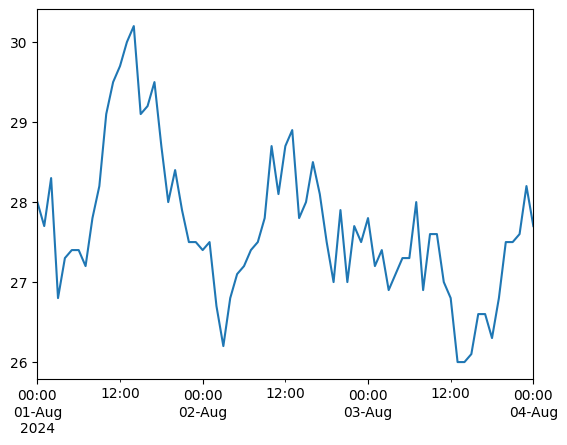

In [47]:
round(predictions,1).plot()

In [48]:
# Make predictions using specific datetime strings
start_date = '2024-08-02 00:00:00'
end_date = '2024-08-05 00:00:00'

# Load the model for prediction
with open(f'temp_SARIMA_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-02 00:00:00 to 2024-08-05 00:00:00 : 

2024-08-02 00:00:00    27.4
2024-08-02 01:00:00    27.5
2024-08-02 02:00:00    26.7
2024-08-02 03:00:00    26.2
2024-08-02 04:00:00    26.8
                       ... 
2024-08-04 20:00:00    27.3
2024-08-04 21:00:00    27.1
2024-08-04 22:00:00    27.1
2024-08-04 23:00:00    27.7
2024-08-05 00:00:00    27.3
Freq: H, Name: predicted_mean, Length: 73, dtype: float64


<Axes: >

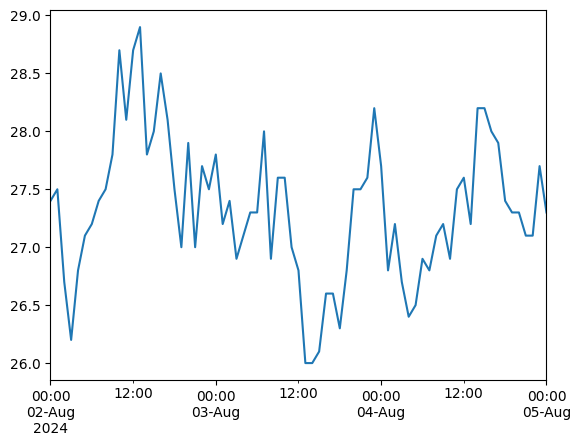

In [49]:
round(predictions,1).plot()

In [50]:
# Make predictions using specific datetime strings
start_date = '2024-08-03 00:00:00'
end_date = '2024-08-06 00:00:00'

# Load the model for prediction
with open(f'temp_SARIMA_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-03 00:00:00 to 2024-08-06 00:00:00 : 

2024-08-03 00:00:00    27.8
2024-08-03 01:00:00    27.2
2024-08-03 02:00:00    27.4
2024-08-03 03:00:00    26.9
2024-08-03 04:00:00    27.1
                       ... 
2024-08-05 20:00:00    26.5
2024-08-05 21:00:00    26.2
2024-08-05 22:00:00    26.9
2024-08-05 23:00:00    26.4
2024-08-06 00:00:00    26.6
Freq: H, Name: predicted_mean, Length: 73, dtype: float64


<Axes: >

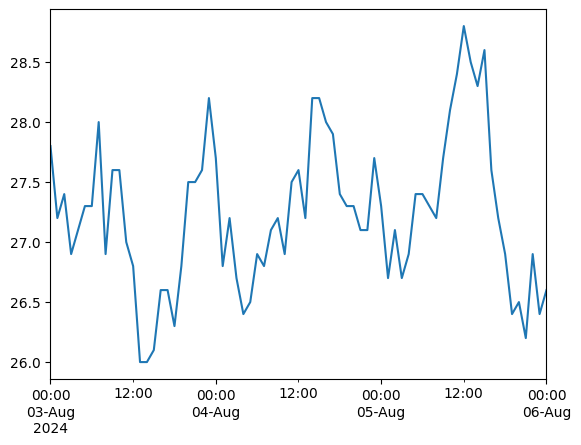

In [51]:
round(predictions,1).plot()

In [52]:
# Make predictions using specific datetime strings
start_date = '2024-08-01 00:00:00'
end_date = '2024-08-06 00:00:00'

# Load the model for prediction
with open(f'temp_SARIMA_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-06 00:00:00 : 

2024-08-01 00:00:00    28.0
2024-08-01 01:00:00    27.7
2024-08-01 02:00:00    28.3
2024-08-01 03:00:00    26.8
2024-08-01 04:00:00    27.3
                       ... 
2024-08-05 20:00:00    26.5
2024-08-05 21:00:00    26.2
2024-08-05 22:00:00    26.9
2024-08-05 23:00:00    26.4
2024-08-06 00:00:00    26.6
Freq: H, Name: predicted_mean, Length: 121, dtype: float64


<Axes: >

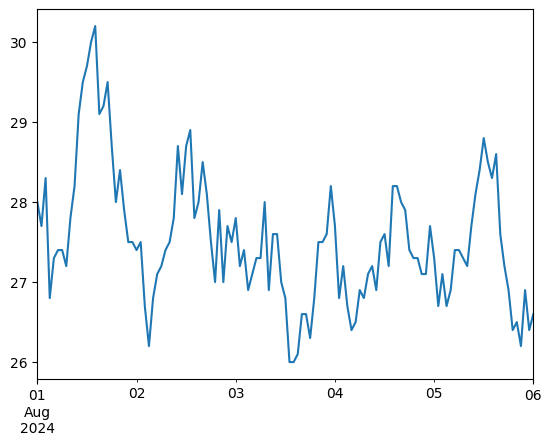

In [53]:
round(predictions,1).plot()

In [54]:
# Make predictions using specific datetime strings
start_date = '2024-08-01 00:00:00'
end_date = '2024-08-11 00:00:00'

# Load the model for prediction
with open(f'temp_SARIMA_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.predict(start=start_date, end=end_date)

# Display the predictions
print("Temperature predictions from {} to {} : \n".format(start_date, end_date))
print(round(predictions,1))

Temperature predictions from 2024-08-01 00:00:00 to 2024-08-11 00:00:00 : 

2024-08-01 00:00:00    28.0
2024-08-01 01:00:00    27.7
2024-08-01 02:00:00    28.3
2024-08-01 03:00:00    26.8
2024-08-01 04:00:00    27.3
                       ... 
2024-08-10 20:00:00    28.2
2024-08-10 21:00:00    28.0
2024-08-10 22:00:00    28.0
2024-08-10 23:00:00    28.3
2024-08-11 00:00:00    27.7
Freq: H, Name: predicted_mean, Length: 241, dtype: float64


<Axes: >

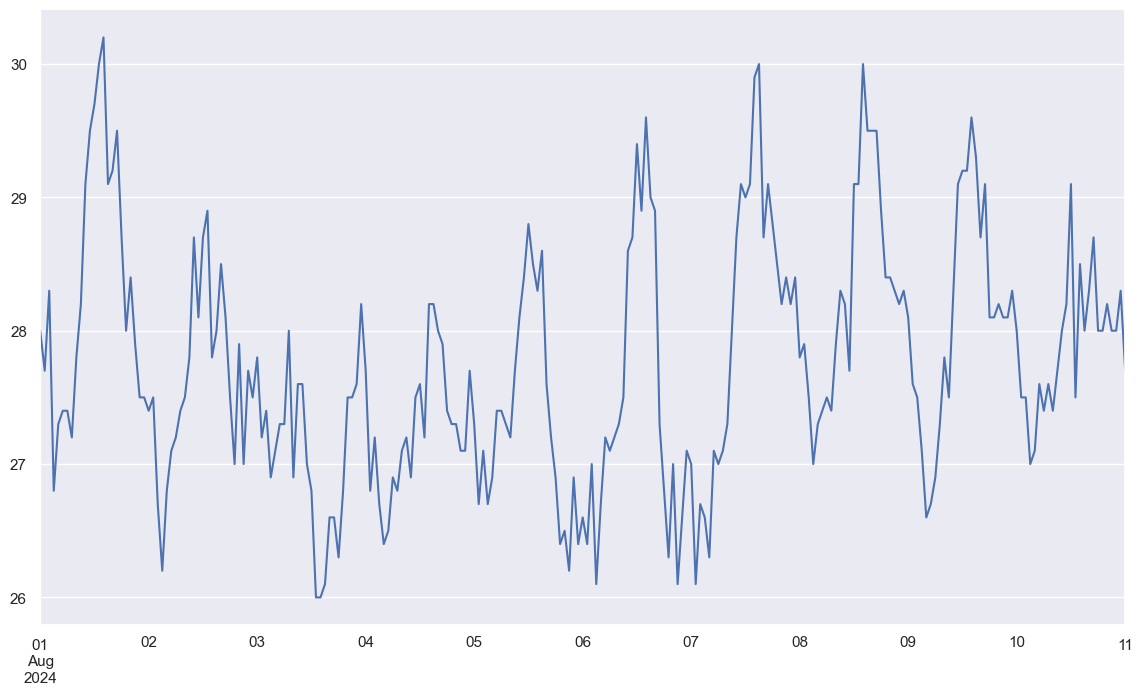

In [58]:
round(predictions,1).plot()

<Axes: >

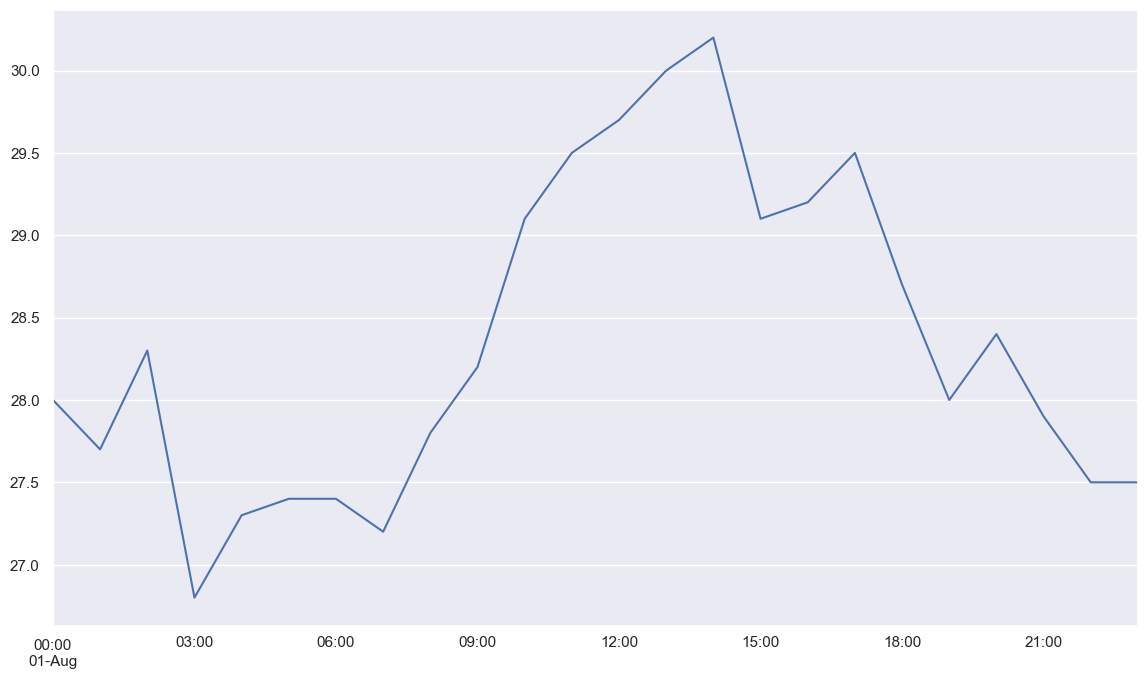

In [59]:
round(predictions[:24],1).plot()